# SỬ DỤNG CÁC THUẬT TOÁN MACHINE LEARNING DỰ ĐOÁN KHẢ NĂNG SỐNG SÓT CỦA CÁC HÀNH KHÁCH TRÊN TÀU TITANIC 

- Link Dataset: https://www.kaggle.com/datasets/brendan45774/test-file/code

### Khai báo các thư viện cần thiết

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import f1_score


### LOADING DATASET TITANIC


In [222]:
#data=pd.read_csv("/kaggle/input/test-file/tested.csv")
data=pd.read_csv("tested.csv")


In [223]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [224]:
data.shape


(427, 12)

In [225]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  427 non-null    int64  
 1   Survived     427 non-null    int64  
 2   Pclass       427 non-null    int64  
 3   Name         427 non-null    object 
 4   Sex          427 non-null    object 
 5   Age          336 non-null    float64
 6   SibSp        427 non-null    int64  
 7   Parch        427 non-null    int64  
 8   Ticket       427 non-null    object 
 9   Fare         426 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     427 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 40.2+ KB


# Thông tin ý nghĩa của các cột dữ liệu trong bộ dữ liệu :

- PassengerId: Mã số hành khách.
- Survived: Biến nhị phân cho biết hành khách đã sống sót (1) hay không (0).
- Pclass: Phân loại vé hành khách, thể hiện hạng ghế trên tàu.
1 = Hạng Nhất,
2 = Hạng Hai,
3 = Hạng Ba.
- Name: Tên đầy đủ của hành khách.
- Sex: Giới tính của hành khách.
- Age: Tuổi của hành khách. Một số giá trị có thể bị thiếu trong bộ dữ liệu này.
- SibSp: Số lượng anh chị em hoặc vợ/chồng cùng đi trên tàu với hành khách.
- Parch: Số lượng cha mẹ hoặc con cái cùng đi trên tàu với hành khách.
- Ticket: Mã số vé.
- Fare: Giá vé.
- Cabin: Số phòng/ cabin nơi hành khách ở. Nhiều giá trị trong cột này có thể bị thiếu.
- Embarked: Cảng mà hành khách lên tàu.
C = Cherbourg,
Q = Queenstown,
S = Southampton.

# 1. KHÁM PHÁ DỮ LIỆU(EDA)

In [226]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,427.000000,427.000000,427.000000,336.000000,427.000000,427.000000,426.000000
mean,1105.000000,0.367681,2.259953,30.055060,0.437939,0.384075,35.116872
std,123.408536,0.482740,0.833772,14.235332,0.889566,0.972644,55.424465
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,998.500000,0.000000,1.500000,21.000000,0.000000,0.000000,7.895800
50%,1105.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1211.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.387500
max,1318.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Kiểm tra dữ liệu có bị thiếu hay không

In [227]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             91
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          336
Embarked         0
dtype: int64

### Phân tích dữ liệu

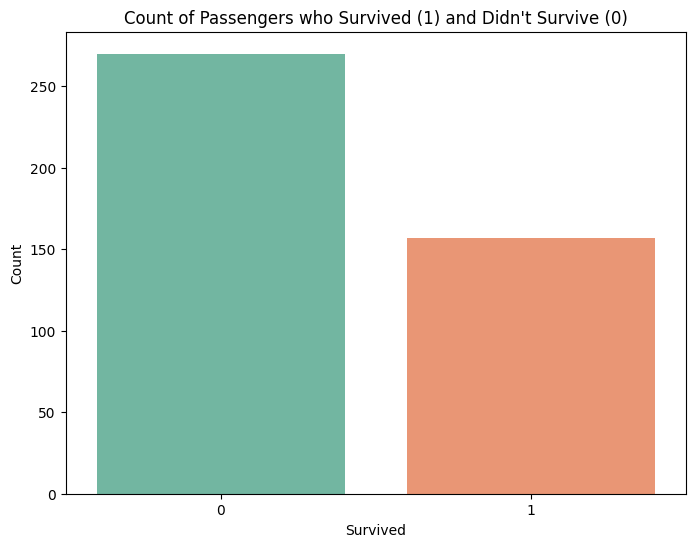

In [228]:
# Số hành khách sống sót (1) và không sống sót (0)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Survived', palette="Set2")
plt.title("Count of Passengers who Survived (1) and Didn't Survive (0)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


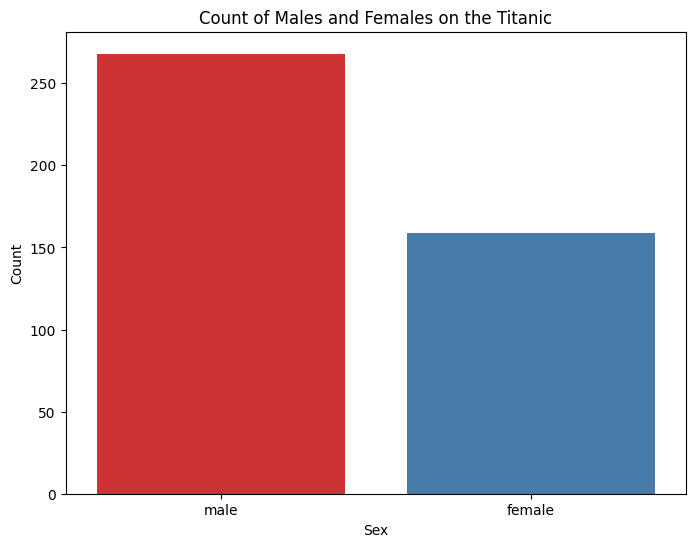

In [229]:
# số lượng nam và nữ trên tàu
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', palette="Set1")
plt.title("Count of Males and Females on the Titanic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


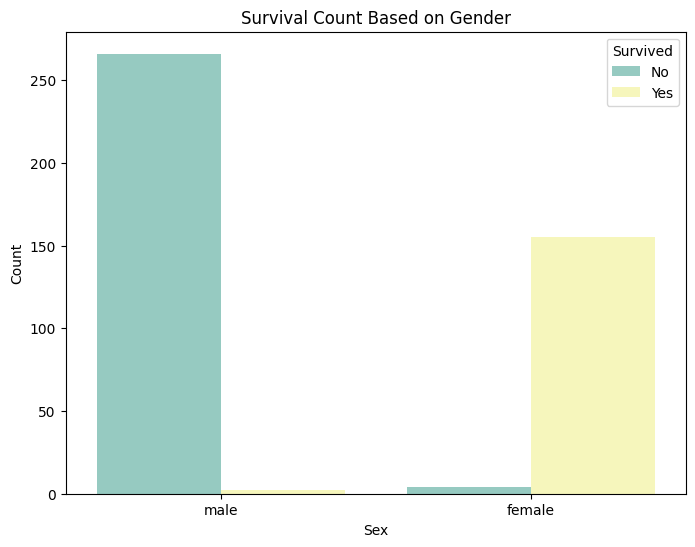

In [230]:
# Số lượng hành khác sống sót và không sống sót theo giới tính
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived', palette="Set3")
plt.title("Survival Count Based on Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


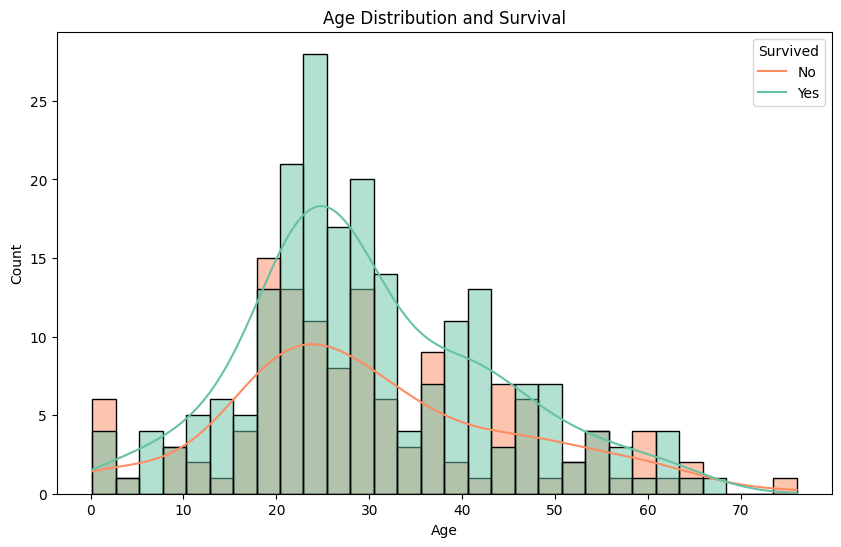

In [231]:
# Phân bố độ tuổi và khả năng sống sót
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True, palette="Set2")
plt.title("Age Distribution and Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


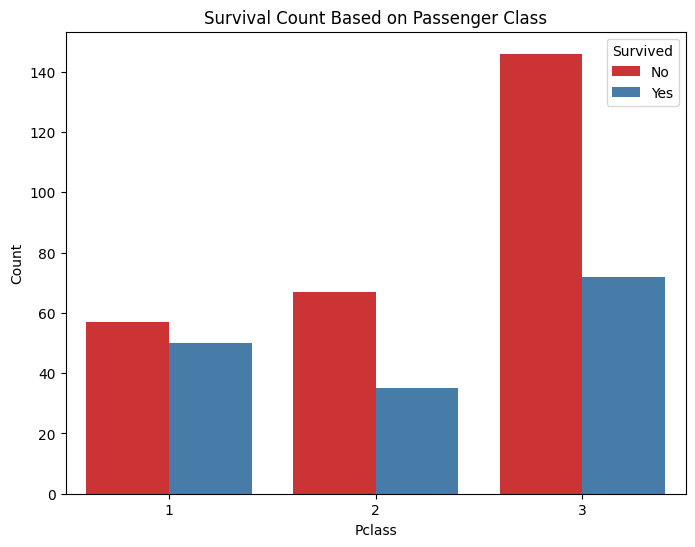

In [232]:
#Phân chia dựa trên lớp hành khách
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived', palette="Set1")
plt.title("Survival Count Based on Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


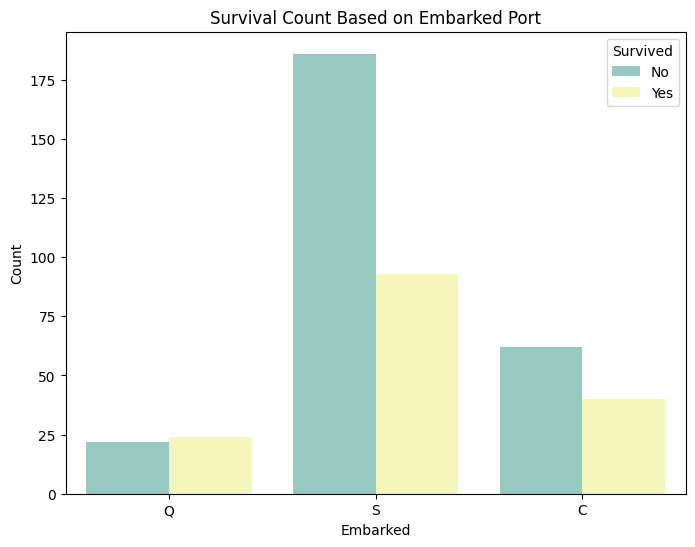

In [233]:
# Phân bố cảng lên tàu và khả năng sống sót
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Embarked', hue='Survived', palette="Set3")
plt.title("Survival Count Based on Embarked Port")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


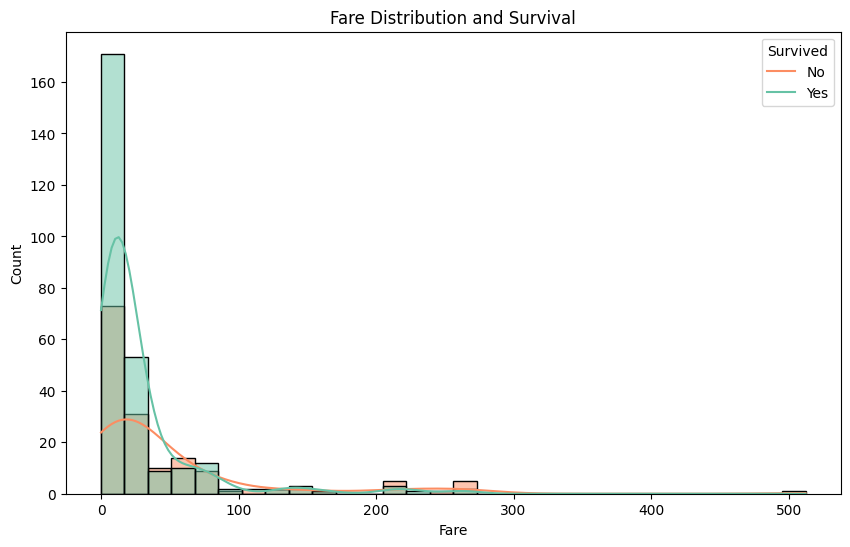

In [234]:
# Phân bố giá vé và khả năng sống sót
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Fare', hue='Survived', bins=30, kde=True, palette="Set2")
plt.title("Fare Distribution and Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


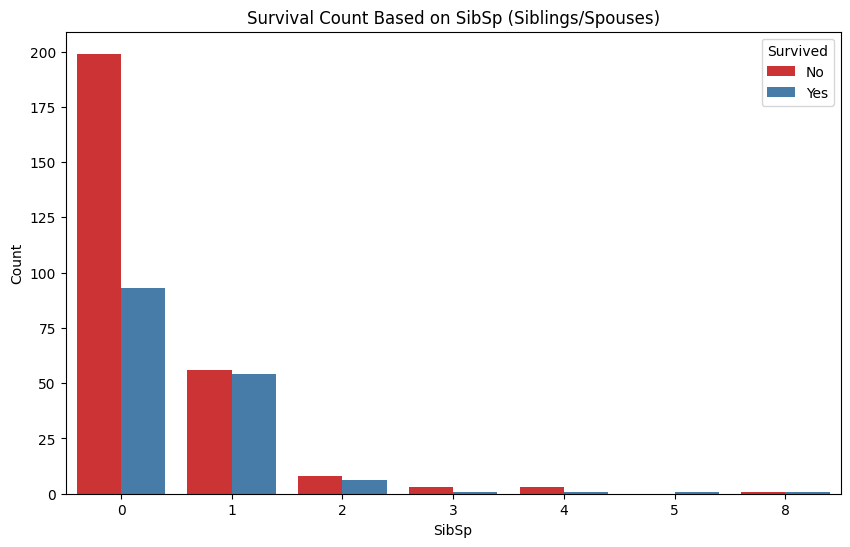

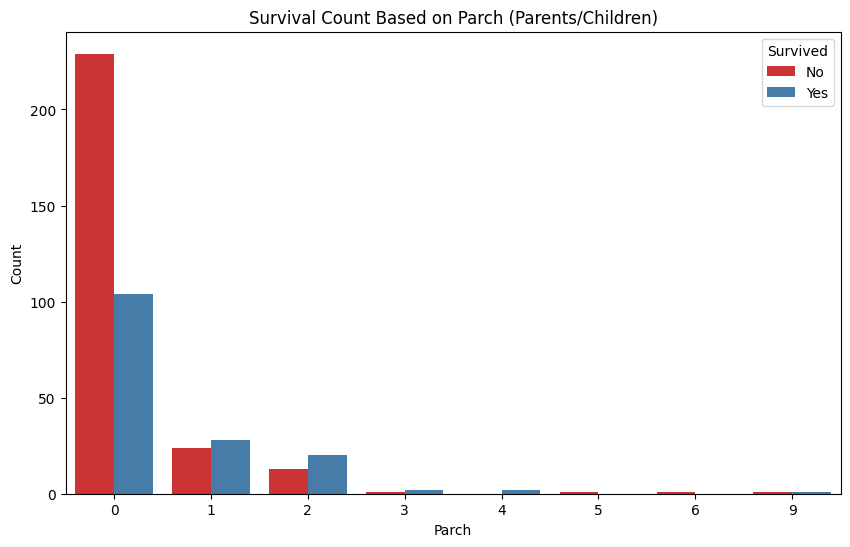

In [235]:
#Phân bố dựa trên số lượng anh chị em và vợ chồng
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SibSp', hue='Survived', palette="Set1")
plt.title("Survival Count Based on SibSp (Siblings/Spouses)")
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

#Phân bố dựa trên số lượng bố mẹ và con cái
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Parch', hue='Survived', palette="Set1")
plt.title("Survival Count Based on Parch (Parents/Children)")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


## Data Visualization

/var/folders/f6/25znvzcs267g_4x15l18fhwh0000gn/T/ipykernel_90114/608644246.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdBu_r")


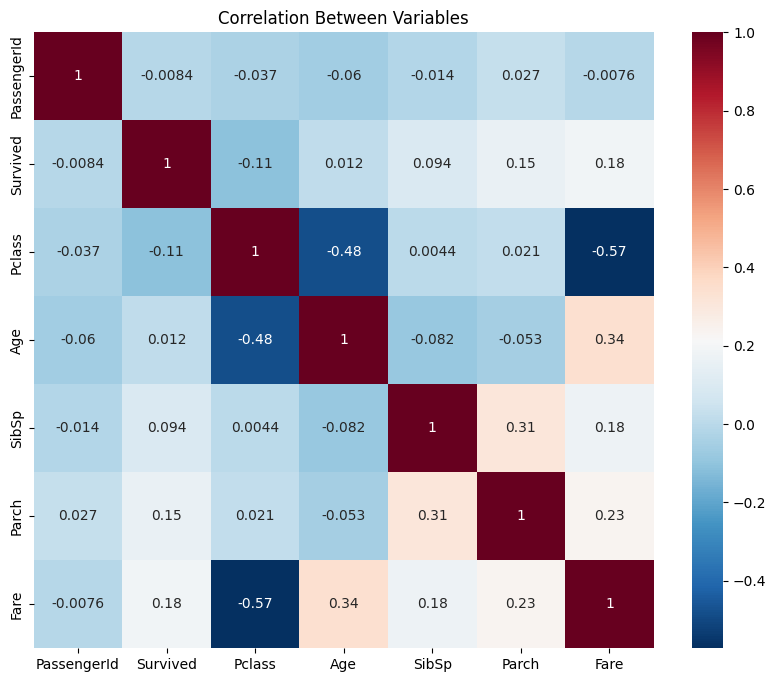

In [236]:
# Biểu đồ tương quan giữa các biến
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="RdBu_r")
plt.title("Correlation Between Variables")
plt.show()


## BUILDING MODEL

In [237]:
#Xử lý dữ liệu
#Xóa các cột không cần thiết
data.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)
X = data.drop("Survived", axis=1)
y = data["Survived"]
X


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
422,2,female,NaN,0,0,8.0500,S
423,2,female,12.0,0,0,15.7500,S
424,2,female,12.0,0,0,15.7500,S
425,2,female,12.0,0,0,15.7500,S


- Chia dữ liệu thành 2 phần train và test

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Tiền xử lý dữ liệu: Thay thế dữ liệu bị thiếu

In [239]:
#  preprocessing steps for numeric and categorical data
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_features = ["Sex", "Embarked", "Pclass"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)]
    )


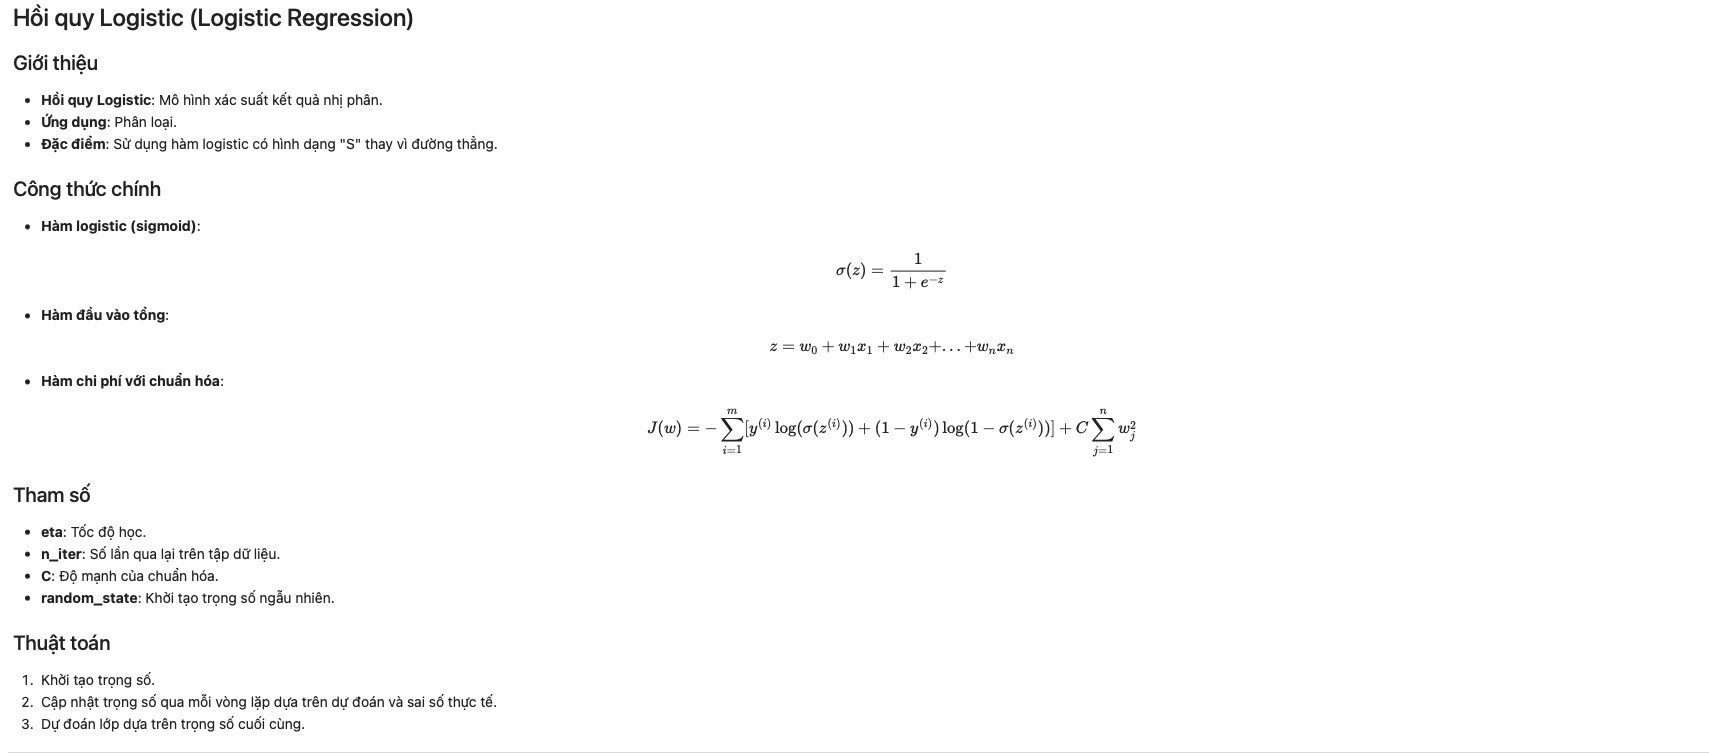

In [240]:
#classifiers logistic regression
class LogisticRegression:
   def __init__(self, eta=0.05, n_iter=100, random_state=1):
      self.eta = eta
      self.n_iter = n_iter
      self.random_state = random_state
   def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) 
      self.cost_ = []
      
      for i in range(self.n_iter):
         net_input = self.net_input(X)
         output = self.activation(net_input) 
         errors = (y - output)
         self.w_[1:] += self.eta * X.T.dot(errors) 
         self.w_[0] += self.eta * errors.sum()
         
         # note that we compute the logistic `cost` now
         # instead of the sum of squared errors cost
         cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) 
         self.cost_.append(cost)
      return self
   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.w_[1:]) + self.w_[0]
   def activation(self, z):
      """Compute logistic sigmoid activation"""
      return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.net_input(X) >= 0.0, 1, 0)


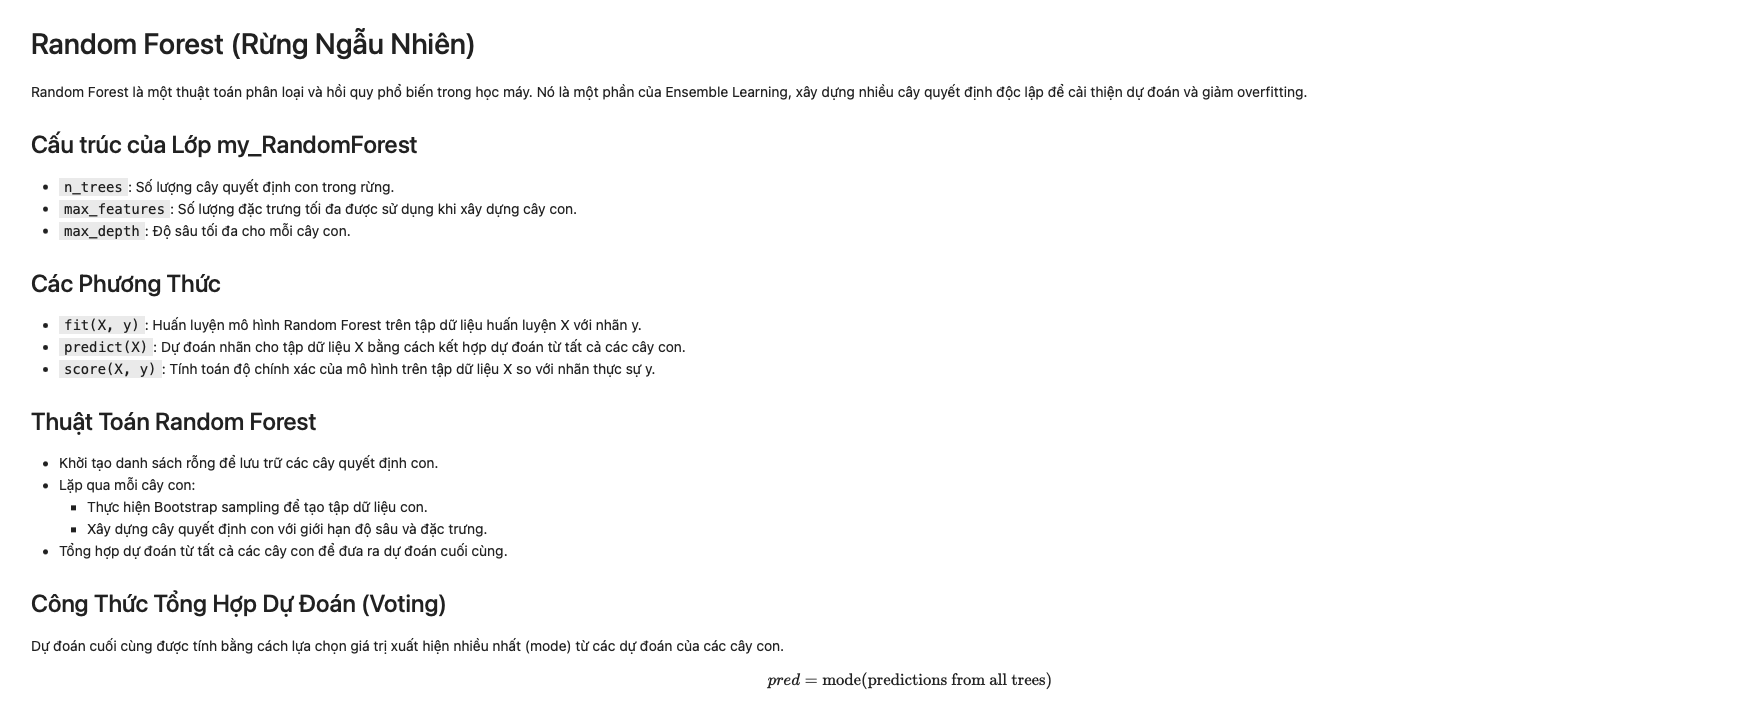

In [241]:
class my_RandomForest:
    def __init__(self, n_estimators=10, max_features='sqrt', max_depth=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples, n_features = X.shape

        if self.max_features == 'sqrt':
            max_features = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            max_features = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            max_features = self.max_features
        else:
            raise ValueError("Invalid value for max_features")

        for _ in range(self.n_estimators):
            # Bootstrap sampling
            X_sample, y_sample = resample(X, y)
            tree = DecisionTreeClassifier(max_depth=self.max_depth, max_features=max_features)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        y_pred = np.squeeze(stats.mode(tree_preds, axis=0).mode)
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy
    

### Kiểm tra độ chính xác của các thuật toán

In [242]:
rf_classifier = my_RandomForest(n_estimators=10000)
svc_classifier = SVC(probability=True)
lr_classifier = LogisticRegression(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
gb_classifier = GradientBoostingClassifier(n_estimators=10000, random_state=42)


- Áp dụng mô hình học máy với các tham số tối ưu đã tìm được triển khai bằng SKlearn

In [243]:
# Random Forest
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", rf_classifier)
])

rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_report = classification_report(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred, average='weighted')

print("Classifier: Random Forest")
print("f1_score")
print(f"Accuracy: {100*rf_accuracy:.2f}%")
print(rf_report)
print("\n")


Classifier: Random Forest
f1_score:  1.0
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        36

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86





In [244]:
# SVC
svc_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", svc_classifier)
])

svc_model.fit(X_train, y_train)
y_svc_pred = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, y_svc_pred)
svc_report = classification_report(y_test, y_svc_pred)
svc_f1 = f1_score(y_test, y_svc_pred)

print("Classifier: SVC")
print("f1_score: ", svc_f1)
print(f"Accuracy: {100*svc_accuracy:.2f}%")
print(svc_report)
print("\n")


Classifier: SVC
f1_score:  0.9577464788732395
Accuracy: 96.51%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.97      0.94      0.96        36

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.97        86





In [245]:
# Logistic Regression
lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", lr_classifier)
])

lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_lr_pred)
lr_report = classification_report(y_test, y_lr_pred)
lr_f1 = f1_score(y_test, y_lr_pred, average='weighted')

print("Classifier: Logistic Regression")
print("f1_score: ", lr_f1)
print(f"Accuracy: {100*lr_accuracy:.2f}%")
print(lr_report)
print("\n")

Classifier: Logistic Regression
f1_score:  0.9767441860465116
Accuracy: 97.67%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      0.97      0.97        36

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86





In [246]:
# K-Nearest Neighbors
knn_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", knn_classifier)
])

knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_report = classification_report(y_test, y_knn_pred)
knn_f1 = f1_score(y_test, y_knn_pred)
print("Classifier: K-Nearest Neighbors")
print("f1_score: ",knn_f1)
print(f"Accuracy: {100*knn_accuracy:.2f}%")
print(knn_report)
print("\n")

Classifier: K-Nearest Neighbors
f1_score:  0.9295774647887323
Accuracy: 94.19%
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.94      0.92      0.93        36

    accuracy                           0.94        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.94      0.94      0.94        86





In [247]:
# Gradient Boosting


gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", gb_classifier)
])

gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_gb_pred)
gb_report = classification_report(y_test, y_gb_pred)
gb_f1 = f1_score(y_test, y_gb_pred)
print("Classifier: Gradient Boosting")
print("f1_score: ", gb_f1)
print(f"Accuracy: {100*gb_accuracy:.2f}%")
print(gb_report)
print("\n")

Classifier: Gradient Boosting
f1_score:  1.0
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        36

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86





In [248]:
# # Define a list of classifiers
# classifiers = {
#     "Random Forest": RandomForestClassifier(n_estimators=10000, random_state=42),
#     "SVC": SVC(probability=True),
#     #"Logistic Regression": LogisticRegression(max_iter=1000), # gọi thư viện
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
#     "Gradient Boosting": GradientBoostingClassifier(n_estimators=10000, random_state=42)
# }


In [249]:
# # Train and evaluate each classifier
# for clf_name, clf in classifiers.items():
#     model = Pipeline(steps=[
#         ("preprocessor", preprocessor),
#         ("classifier", clf)
#     ])
    
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)
    
#     print(f"Classifier: {clf_name}")
#     print(f"Accuracy: {100*accuracy:.2f}%")
#     print(report)
#     print("\n")


### Dự đoán cho khách hàng ngẫu nhiên

In [250]:
#predicting with a random passenger

# Define the passenger's data
passenger_data = pd.DataFrame({
    'Pclass': [1],
    'Sex': ['female'],
    'Age': [100],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [10],
    'Cabin': ['Unknown'],
    'Embarked': ['P']
})


# Defining the model (using the Gradient Boosting classifier)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", gb_classifier)
])

# Train the best model on the entire dataset
model.fit(X, y)
prediction = model.predict(passenger_data)

# #prdeiction
answer = "passenger survived" if prediction == 1 else "passenger did not survive"
answer


'passenger survived'

->dự đoán đúng